# Check results from Gaussian smoothed spikes
with `nthist = 1`, `window_size = 5`

In [1]:
import pickle
from pathlib import Path
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from param import *

sns.set_theme(style="whitegrid", palette=sns.diverging_palette(12,30, s=100, l=50, sep=1,  n=7, center="dark"))
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

## penalty from the best results

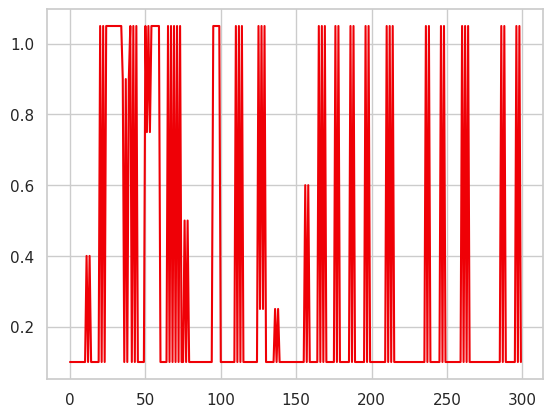

In [11]:
penalty_list = []
for m_id, data_dir in enumerate(datalist[[0]]):
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    with open(output_dir/(f"rr_smoothed_spikes_eval_{data_name}.pickle"),"rb") as f:
        eval_results_all = pickle.load(f)
    for result in eval_results_all:
        penalty_list.append(result["estimator"].penalty)
plt.plot(penalty_list)

## visulization of the test and pred coordinates
`nthist = 1`, `window_size = 5`

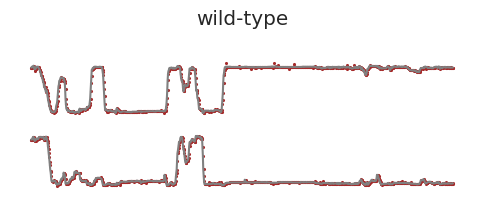

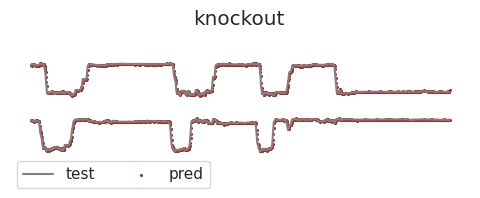

In [12]:
conf_level = .01
for m_id, data_dir in enumerate(datalist[[2,0]]):
    fig, axes = plt.subplots(nrows = 2, sharey='row', figsize=(5,2),tight_layout = True)
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    with open(output_dir/(f"rr_smoothed_spikes_eval_{data_name}.pickle"),"rb") as f:
        eval_results_all = pickle.load(f)
    for result in eval_results_all:
        if result["coord_axis"] == "x-axis" and result["nthist"] == 1 and result["window_size"] == 5:
            # coordinate
            axes[0].plot(result["y_test"]/5, c = "gray", label="test")
            axes[0].scatter(np.arange(len(result["y_pred"])),result["y_pred"]/5, c = "brown", label="pred", s=1.5)
            axes[0].axis('off')

        if result["coord_axis"] == "y-axis" and result["nthist"] == 1 and result["window_size"] == 5:
            # coordinate
            axes[1].plot(result["y_test"]/5, c = "gray", label="test")
            axes[1].scatter(np.arange(len(result["y_pred"])),result["y_pred"]/5, c = "brown", label="pred", s=1.5)
            axes[1].axis('off')
    plt.suptitle(mouse_type)
plt.legend(bbox_to_anchor=(.45, 0), ncol=3)

## Fiited Coefficients

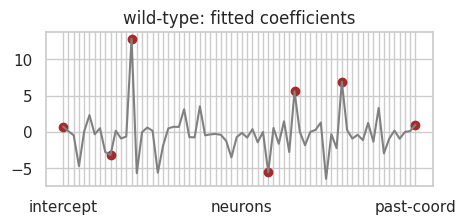

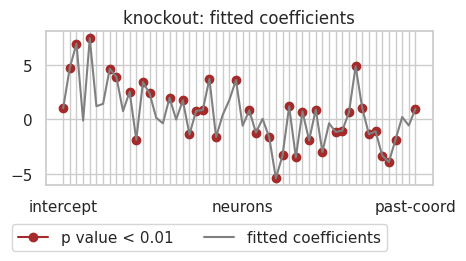

In [15]:
for data_dir in datalist[[2,0]]:
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    with open(output_dir/(f"rr_smoothed_spikes_eval_{data_name}.pickle"),"rb") as f:
        eval_results_all = pickle.load(f)


    conf_level = .01
    coord_axis, nthist= "x-axis", 1
    result = [result for result in eval_results_all if (result["coord_axis"] == coord_axis) and (result["nthist"]==nthist) and (result["window_size"]==5)][0]

    fig, ax = plt.subplots(figsize=(5,2))
    ax.plot(result["estimator"].fitted_param, label = f"nthist:", c="gray")

    labels = ax.get_xticks().tolist()
    xx = np.arange(len(result["estimator"].fitted_param))
    for ii, p_value in enumerate(result['sig_tests'].t_p_value_list):
        if (p_value < conf_level) or (p_value > 1 - conf_level):
            ax.scatter(xx[ii], result["estimator"].fitted_param[ii], c="brown")
    labels = [''] * len(result["estimator"].fitted_param)
    labels[0],labels[int(len(labels)/2)] ,labels[-1] = "intercept", "neurons", "past-coord"
    ax.set_xticks(xx, labels)
    ax.set_title(f"{mouse_type}: fitted coefficients")

legend_elements = [
                Line2D([0], [0], marker='o', c="brown", label=f"p value < {conf_level}"),
                Line2D([0], [0], c="gray", label=f"fitted coefficients")
                ]
ax.legend(handles=legend_elements, ncol=2, bbox_to_anchor=(.9, -.2))
